In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFilter
from sklearn.svm import SVC
%matplotlib inline

In [23]:
training_images = [image for image in os.listdir('train/')]
print(training_images[0])

test_images = [image for image in os.listdir('test1/')]
print(test_images[0])

cat.0.jpg
1.jpg


In [24]:
labels = []
for image in training_images:
    if 'dog' in image:
        labels.append(1)
    else:
        labels.append(0)

In [25]:
features = []
pixel_value = 0

model_svmClassifier = SVC() # Initializing the model with default RBF Kernel for the faster results

# Extracting the features
for picture in training_images:
    image = Image.open('train/'+ picture).convert('L') #Opening an image,resizing,filtering all the edges,creating a histogram
    size = 64,64
    
    image = image.resize(size, Image.ANTIALIAS)
    image = image.filter(ImageFilter.FIND_EDGES)
    pixel_value = image.histogram() 
    
    features.append(pixel_value) # Storing an image inside an empty features array

model_svmClassifier = model_svmClassifier.fit(features, labels) # Training the SVM model. 

In [26]:
results=[]
total=0

for picture in training_images:
    image = Image.open('train/' + picture).convert('L')
    size=64,64
    image = image.resize(size, Image.ANTIALIAS)
    image =image.filter(ImageFilter.FIND_EDGES)
    pixel_value=image.histogram()
    x = model_svmClassifier.predict([pixel_value])
    results.append(x[0]) 

print("Length",len(results))

total=np.sum(np.logical_and(labels,results))
print("Accuracy:",total,"/",len(results),"* 100 =","{0:.3f}".format(total/len(results)*100),"%")

Length 25000
Accuracy: 8317 / 25000 * 100 = 33.268 %


In [40]:
results=[]

for picture in test_images[:7]:
    print(picture)
    image = Image.open('test1/' + picture).convert('L')
    size=64,64
    image = image.resize(size, Image.ANTIALIAS)
    image =image.filter(ImageFilter.FIND_EDGES)
    pixel_value=image.histogram()
    x = model_svmClassifier.predict([pixel_value])
    print(x)
    results.append(x[0]) 

print("**********") 
print("Length",len(results))

1.jpg
[1]
10.jpg
[0]
100.jpg
[0]
1000.jpg
[1]
10000.jpg
[1]
10001.jpg
[1]
10002.jpg
[0]
**********
Length 7


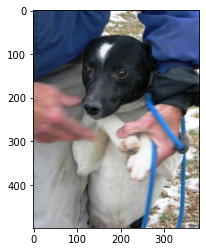

In [34]:
#According to the model image is a dog
img = mpimg.imread('test1/1.jpg')
imgplot = plt.imshow(img)

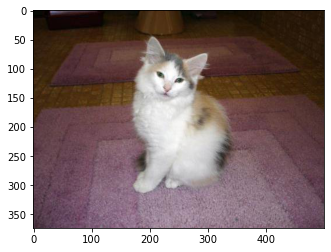

In [36]:
#According to the model image is a cat
img = mpimg.imread('test1/10.jpg')
imgplot = plt.imshow(img)

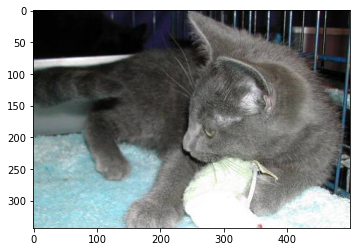

In [37]:
#According to the model image is a cat
img = mpimg.imread('test1/100.jpg')
imgplot = plt.imshow(img)

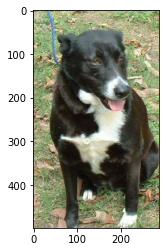

In [38]:
#According to the model image is a dog
img = mpimg.imread('test1/1000.jpg')
imgplot = plt.imshow(img)

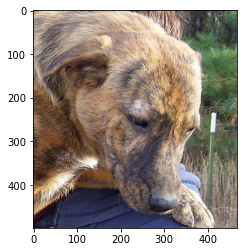

In [39]:
#According to the model image is a dog
img = mpimg.imread('test1/10000.jpg')
imgplot = plt.imshow(img)

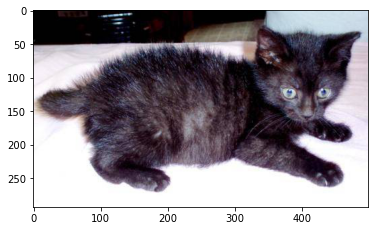

In [41]:
#According to the model image is a dog
img = mpimg.imread('test1/10001.jpg')
imgplot = plt.imshow(img)

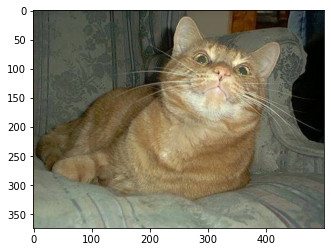

In [42]:
#According to the model image is a cat
img = mpimg.imread('test1/10002.jpg')
imgplot = plt.imshow(img)